### Chapter 5.4 
# GI/M/1 Delay System with Geometric Approach

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---


The geometric approach is used to analyze the condition. The state probability is

$x(j)=(1-\sigma)\sigma^j, j>=0, \rho<1$

The parameter $ \sigma $ can be determined numerically by solving the following equation. The random variable $ \Gamma $ is the number of requests that can be served during an interarrival time $A$. While $ A $ follows a general distribution, the service time $B$ is described by an exponential distribution with rate $ \mu $, i.e. $ B \sim \mathrm{EXP}(\mu) $.

$ z = \Gamma_{GF}(z)$

In the following we consider a uniform distribution in the interval $[0,2/\lambda]$ for the interarrival time $A$ with the mean value $E[A]=1/\lambda$. It is $A \sim U(0,2/\lambda)$. The Laplace transform of the continuous uniform distribution is

$ \Phi_A(s) =  \frac{e^{-sa}-e^{-sb}}{s(b-a)} = \frac{1-e^{-sb}}{s\cdot b} $

with $a=0$ and $b = 2/\lambda$.

The generating function is obtained with the help of the [Laplace transform of the uniform distribution](https://en.wikipedia.org/wiki/Laplace%E2%80%93Stieltjes_transform).

$ \Gamma_{GF}(z) = \phi_A(\mu(1-s))$

Now we need to solve

$ z = \Gamma_{EF}(z)$. 

To do this, we calculate the solution of $\Gamma_{EF}(z)-z=0$. There are numerical methods such as [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

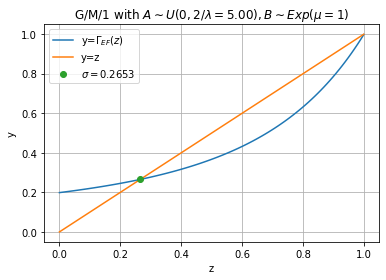

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lam = 0.4
mu = 1

def gamEF(z, lam=0.5, mu=1):
    return (1-np.exp(-2/lam*mu*(1-z)))/(2/lam*mu*(1-z))

z = np.linspace(0,0.999,100)
plt.plot(z, gamEF(z, lam=lam), label='y=$\Gamma_{EF}(z)$')
plt.plot(z, z, label='y=z')
plt.grid()
plt.xlabel('z')
plt.ylabel('y')
plt.legend()
plt.title(f'G/M/1 with $A \sim U(0,2/\lambda={2/lam:.2f}), B \sim Exp(\mu={mu})$');


from scipy.optimize import fsolve

def intersection(lam=0.5, mu=1):
    return fsolve(lambda z: gamEF(z, lam=lam)-z, 0.3)

sigma = intersection(lam=lam)

plt.plot(sigma, gamEF(sigma, lam=lam), 'o', label=f'$\sigma={sigma[0]:.4f}$')
plt.legend();

## Waiting Time Distribution
The waiting time distribution function $W(t)$ for customers in a GI/M/1 delay system with the waiting probability $\sigma$ is:

$W(t)     = 1 \: - \: \sigma \; e^{\displaystyle  -(1\,-\, \sigma) \, \mu \, t}\,. $

The waiting probability is 

$ p_W = \sigma \quad$ (for GI/M/1) and therefore depends on the type of distribution of the interarrival time $A$.

In contrast, for an M/GI/1 system, the waiting probability follows from the utilization $\rho$ of the system and is independent of the type of distribution of the service time $B$:

$p_W = \rho \quad$ (for M/GI/1).



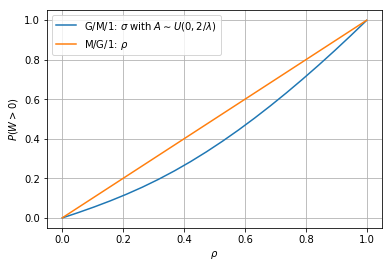

In [3]:
#%% Waiting probability: sigma=P(W>0)
plt.figure(2)
plt.clf()
lams = np.linspace(0.001,0.999,20)
sigmas = [intersection(lam=x) for x in lams]
plt.plot(lams/mu, sigmas, label='G/M/1: $\sigma$ with $A \sim U(0,2/\lambda)$')
plt.plot(lams/mu, lams/mu, label='M/G/1: $\\rho$')
plt.grid()
plt.xlabel('$\\rho$')
plt.ylabel('$P(W>0)$')
plt.legend();